 <font size="22"> Prediction on Diabetes Condition Using BMI, Blood Glucose, and Age</font> 

 <font size="5"> Group 31: Alton Ho, Ivy Feng, Jasmine Li, Marshal Shuai Zhang</font> 

 <font size="15">Introduction</font> 

Diabetes is a pervasive and debilitating metabolic disorder that has severe health implications, including cardiovascular diseases, kidney dysfunction, and vision problems. Early detection and proactive management are vital to curbing these effects. As of the last update in January 2022, nearly 463 million adults globally were living with diabetes, and this number was projected to reach 700 million by 2045. These staggering statistics emphasize the urgency of innovative approaches to combat this epidemic.

Our project focuses on predicting diabetes risk using parameters like smoking history, BMI, age, hypertension, and blood glucose levels. This initiative aims to create a model that can identify potential diabetes cases, ultimately improving individuals' quality of life and reducing healthcare costs.

The ultimate question is: **Is the new patient likely to have diabetes based on their blood glucose, BMI, and age?**

In [18]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(dplyr) 

<font size="15">Preliminary exploratory data analysis</font> 

In [19]:
diabetes_data <- read_csv("https://raw.githubusercontent.com/altonho67/dsci-100-2023w1-group-31/main/data/diabetes_2.csv")
diabetes_data <- diabetes_data %>%
                 mutate(Outcome = as.factor(Outcome))|>
                 mutate(Outcome = fct_recode(Outcome, "Diabetes" = "1", "None" = "0")) |>
                 mutate_at(c('SkinThickness','Insulin','BloodPressure','Glucose'), ~na_if(., 0))

diabetes_split <- initial_split(diabetes_data, prop = 3/4, strata = Outcome)
diabetets_training <- training(diabetes_split)
diabetets_testing <- testing(diabetes_split)
head(diabetets_training)


Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,NA,33.6,0.627,50,Diabetes
8,183,64,NA,NA,23.3,0.672,32,Diabetes
3,78,50,32,88,31.0,0.248,26,Diabetes
2,197,70,45,543,30.5,0.158,53,Diabetes
8,125,96,NA,NA,0.0,0.232,54,Diabetes
1,189,60,23,846,30.1,0.398,59,Diabetes


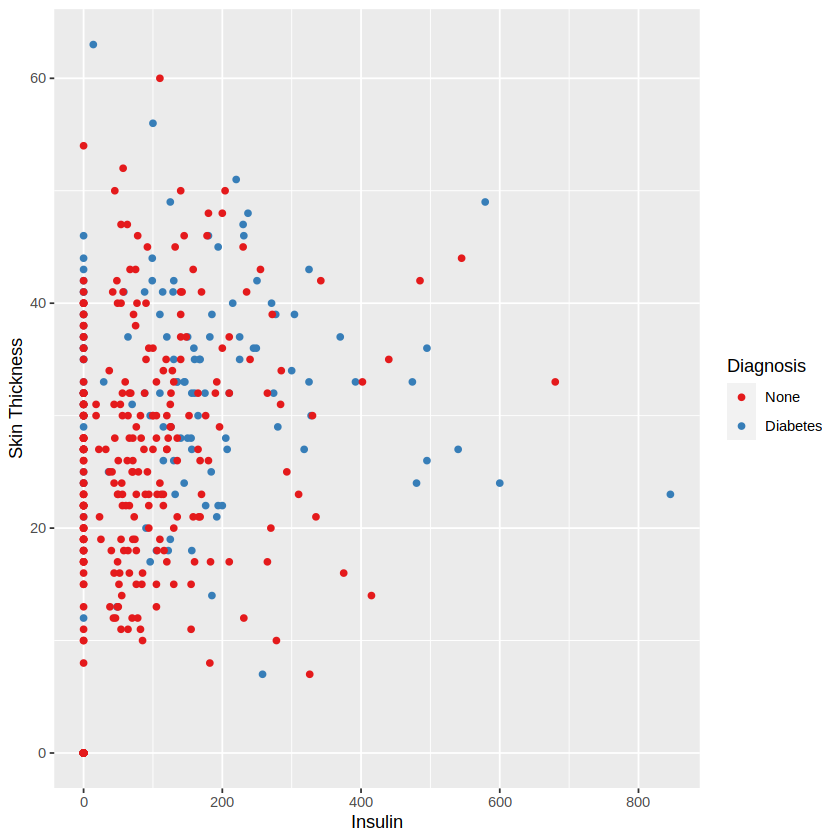

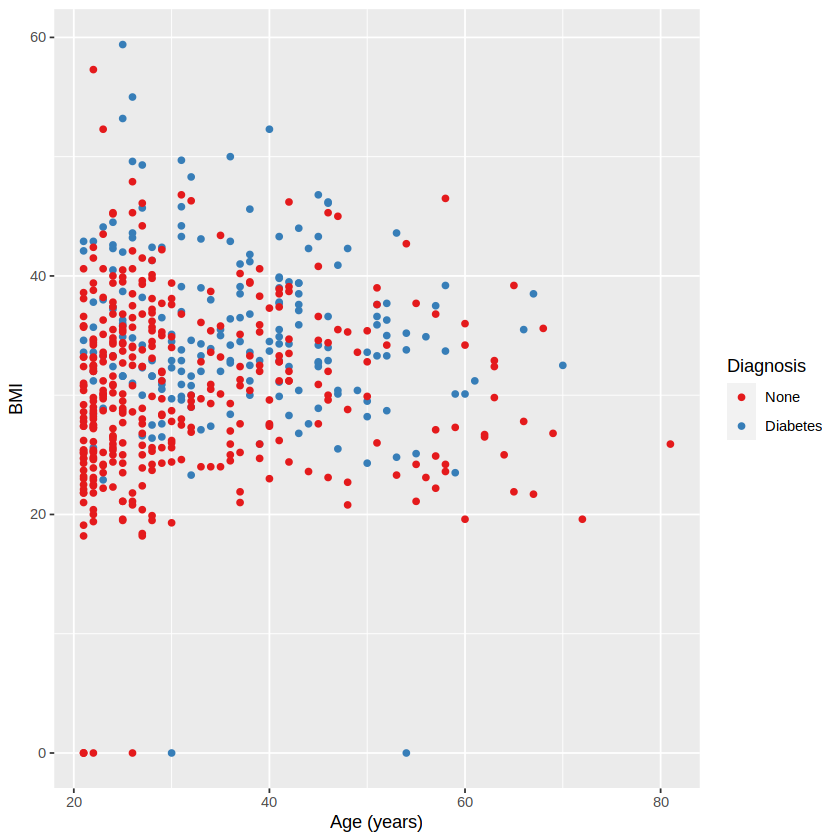

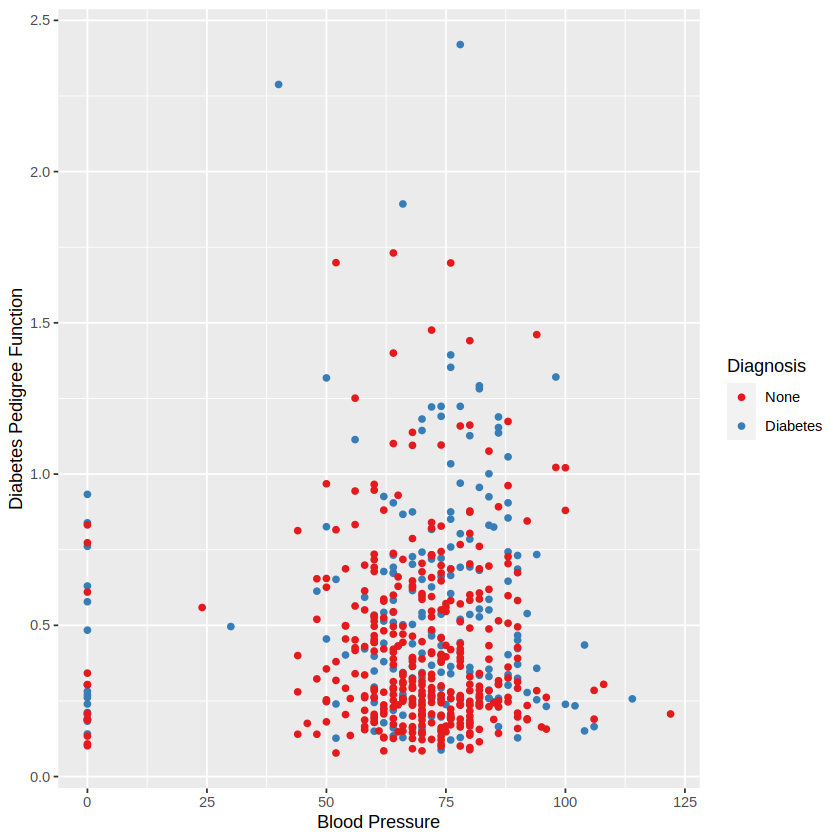

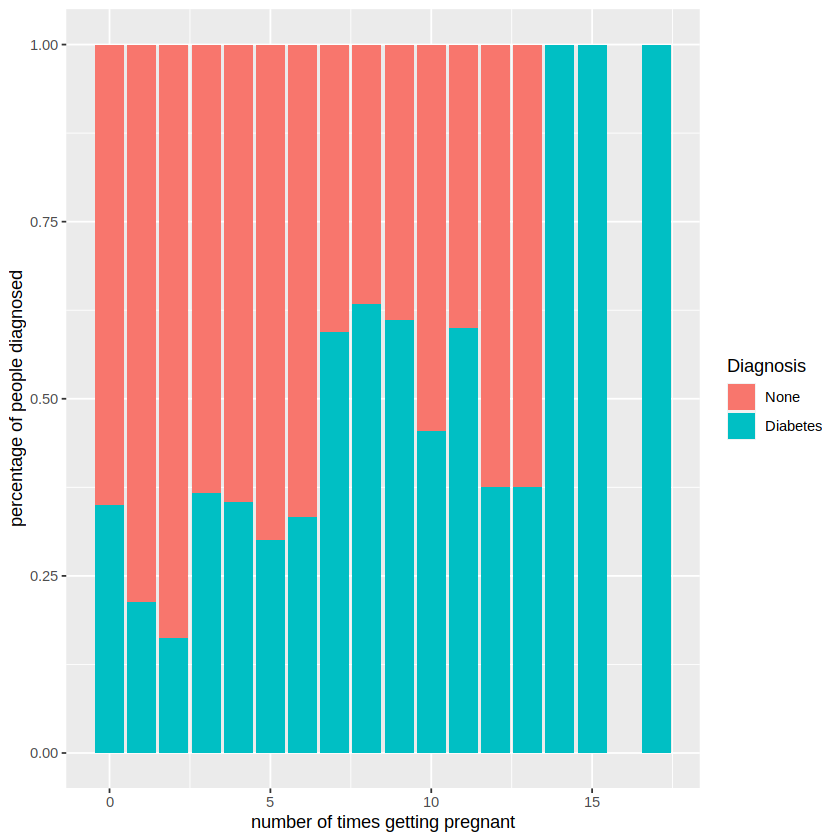

In [3]:
plot1 <- ggplot(diabetets_training, aes(x = Insulin, y = SkinThickness, color = Outcome)) +
                 geom_point() +
                 labs(x = "Insulin", y = "Skin Thickness", color = "Diagnosis") +
                 scale_color_brewer(palette = "Set1")

plot2 <- ggplot(diabetets_training, aes(x = Age, y = BMI, color = Outcome)) +
                 geom_point() +
                 labs(x = "Age (years)", y = "BMI", color = "Diagnosis") +
                 scale_color_brewer(palette = "Set1")

plot3 <- ggplot(diabetets_training, aes(x = BloodPressure, y = DiabetesPedigreeFunction, color = Outcome)) +
                 geom_point() +
                 labs(x = "Blood Pressure", y = "Diabetes Pedigree Function", color = "Diagnosis") +
                 scale_color_brewer(palette = "Set1")
plot4 <- ggplot(diabetets_training, aes(x = Pregnancies, fill = Outcome,na.rm=TRUE)) +
                 geom_bar(position="fill") +
                 labs(x = "number of times getting pregnant", y = "percentage of people diagnosed", fill = "Diagnosis") +
                 scale_color_brewer(palette = "Set1")


plot1
plot2
plot3


<font size="35"> Methods </font> 

Our group discovered the diabetes dataset on Kaggle at this link https://www.kaggle.com/datasets/mathchi/diabetes-data-set. We downloaded it as CSV format, making it convenient to employ the read_csv function in R for importing the dataset into our project. The original owners of this dataset are the National Institute of Diabetes and Digestive and Kidney Diseases, and the database was provided by Vincent Sigillito (vgs@aplcen.apl.jhu.edu), who serves as the Research Center RMI Group Leader at the Applied Physics Laboratory of The Johns Hopkins University.


The columns and their meaning: 
 Pregnancies represent the number of times an individual has been pregnant. 
Glucose represents plasma glucose concentration for 2 hours in an oral glucose tolerance test. 
Blood Pressure is ​​Diastolic blood pressure measurement (mm Hg). 
Skin thickness measures the Triceps skin fold thickness (mm).
Insulin indicates 2-Hour serum insulin (mu U/ml). 
BMI(Body Mass Index) gives weight in kg/(height in m)^2, an indicator of a person’s fitness and healthy level. 
Diabetes pedigree function (DPF) calculates diabetes likelihood depending on the subject's age and his/her diabetic family history. 
And age is the person’s age. 

All these variables can be used to predict the likelihood  of a person having diabetes. 

To clean the diabetes prediction dataframe, we transformed the outcome into a categorical variable using the as_factor function. In the original dataset, the author assigned the value 1 to indicate a confirmed diabetes condition and 0 to denote the absence of a diabetes condition. We then used the fct_recode function to make 0 and 1 more humanly readable. Additionally, we replaced the missing values, which were initially represented as 0 in certain columns, with 'NA'.


Subsequently, we employed the initial_split function to partition the data into testing (25%) and training (75%) groups. To provide a glimpse of the data, we used the head function to display a small sample of the table.


The three graphs represent different combinations of indicators used to predict an individual's likelihood of being diagnosed with diabetes. We compared various factors against each other to determine which predictors would be included in the final version of the project.

The forth bar chart represents the number of pregnancies plotted against the percentage of people diagnosed with diabetes, showing a slight trend with increasing number of pregnancies correlating to increase percentage of diabetic diagnosis.

We have decided to use Age, BMI, and blood glucose level as our predictors.


<font size="35"> Expected Outcomes and Significance </font> 


We expect that a person with elevated age, high BMI, and high blood glucose level will be diagnosed with diabetes. This is significant because we need to determine the factors that have the most effect on diabetes so that we can learn to prevent it. If BMI is determined to be the factor that can put people at a high risk of diabetes, individuals with elevated BMI (outside the normal range) may need to consider exercising more to prevent diabetes. Also, elderly individuals may have a higher risk of diagnosis, so it's essential for nursing homes to pay extra attention to this group.

We may want to ask why this is the case this way, and what measures can today’s society take to decrease the amount of people suffering from this condition. 
